In [2]:
import matplotlib.pyplot as plt
import numpy as np
import math

In [89]:
def newtraph(func,dfunc,xr,es = 1.0e-4,maxit = 100):
    iterator = 0
    ea = 100
    while True:
        if(dfunc(xr) == 0):
            break
        xrold = xr
        xr -= func(xr)/dfunc(xr)
        iterator+=1

        if(xr!=0):
            ea = abs((xr-xrold)/xr) *100
        
        if(ea<=es or iterator>=maxit):
            break
        
    root =xr
    fx = func(root)
        
    return root,fx,ea,iterator

In [28]:
def fixedpoint(gfunc,xr,es = 1.0e-4, maxit = 100):
    iterator = 0
    ea = 100
    while True:
        xrold = xr
        xr = gfunc(xr)
        iterator +=1
        if(xr!=0):
            ea = abs((xr-xrold)/xr) *100
        if(ea<=es or iterator>=maxit):
            break
    root = xr
    fx = gfunc(root)
    
    return root,fx,ea,iterator

In [30]:
def secant(func,xl,xr , es = 1.0e-4 , maxit = 100):
    iterator = 0
    ea = 100
    while True:
        xrold = xr
        xr -= (func(xr) * (xl - xr))/(func(xl) - func(xr))
        xl = xrold
        iterator +=1
        if(xr!=0):
            ea = abs((xr-xrold)/xr) *100
        if(ea<=es or iterator>=maxit):
            break
    root = xr
    fx = func(root)
    
    return root,fx,ea,iterator

In [39]:
def modified_secant(func, xr , delta , es = 1.0e-4 , maxit = 100):
    iterator = 0
    ea = 100
    while True:
        xrold = xr
        xr -= (delta *xr* func(xr))/(func(xr+delta*xr) - func(xr))
        iterator +=1
        if(xr!=0):
            ea = abs((xr-xrold)/xr) *100
        if(ea<=es or iterator>=maxit):
            break
    root = xr
    fx = func(root)
    
    return root,fx,ea,iterator
        

fm = lambda m: np.sqrt(9.81 * m / 0.25) * np.tanh(np.sqrt(9.81 *0.25 / m)*4) -36

In [32]:
fm = lambda m: np.sqrt(9.81 * m / 0.25) * np.tanh(np.sqrt(9.81 *0.25 / m)*4) -36
dm = lambda m: 1/2 * np.sqrt(9.81/(m*0.25)) * np.tanh(np.sqrt((9.81*0.25)/m) *4) -((9.81) / (2*m)) * 4 * (1/ np.cosh(np.sqrt((9.81*0.25)/m) *4)) **2
root,fx,ea,itera = newtraph(fm,dm,150)
print("root:" , root, "fx:" ,fx , "ea: ",ea , "itera: " , itera)

root: 142.73763310844902 fx: 0.0 ea:  2.1694960772096252e-09 itera:  4


In [33]:
gm = lambda x: math.exp(-x)
root,fx,ea,itera = fixedpoint(gm,0)
print("root:" , root, "fx:" ,fx , "ea: ",ea , "itera: " , itera)

root: 0.56714343762633 fx: 0.5671432069169137 ea:  7.172649124324047e-05 itera:  27


In [52]:
root,fx,ea,itera = secant(fm,150 , 160)
print("root:" , root, "fx:" ,fx , "ea: ",ea , "itera: " , itera)

root: 142.7376331084497 fx: 7.105427357601002e-15 ea:  1.646295182341566e-07 itera:  5


In [40]:
root,fx,ea,itera = modified_secant(fm,50,0.000001)
print("root:" , root, "fx:" ,fx , "ea: ",ea , "itera: " , itera)

root: 142.73763310845445 fx: 1.0658141036401503e-13 ea:  4.081704734081578e-06 itera:  6


In [41]:
gx = lambda x: np.sin(np.sqrt(x))
root,fx,ea,itera = fixedpoint(gx,0.5, 0.01)
print("root:" , root, "fx:" ,fx , "ea: ",ea , "itera: " , itera)

root: 0.7686062313130103 fx: 0.7686333062749909 ea:  0.009655061726320559 itera:  9


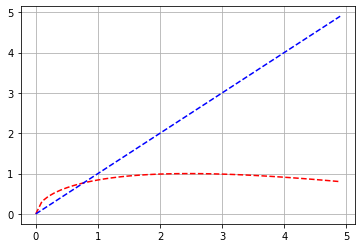

In [43]:
x = np.arange(0, 5, 0.1)
plt.plot(x, np.sin(np.sqrt(x)), 'r--')
plt.plot(x, x , 'b--')
plt.grid()
plt.show()

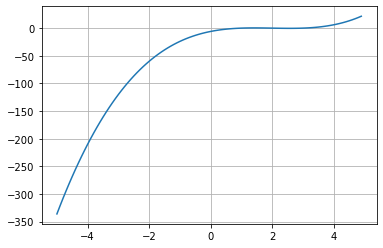

In [44]:
x = np.arange(-5,5,0.1)
plt.plot(x, x**3-6*x**2 + 11 *x -6.1)
plt.grid()
plt.show()

In [64]:
funcx = lambda x: x**3-6*x**2 + 11 *x -6.1
dx = lambda x: 3*x**2 -12*x +11
funcx(2)

-0.09999999999999964

In [65]:
root,fx,ea,itera = newtraph(funcx,dx,3.5,maxit=3)
print("root:" , root, "fx:" ,fx , "ea: ",ea , "itera: " , itera)

root: 3.047316736908595 fx: 0.0014560307849311727 ea:  0.7016692386297088 itera:  3


In [66]:
root,fx,ea,itera = secant(funcx,2.5,3.5,maxit=3)
print("root:" , root, "fx:" ,fx , "ea: ",ea , "itera: " , itera)

root: 3.2219234494376807 fx: 0.50252668485488 ea:  10.88892866220558 itera:  3


In [67]:
root,fx,ea,itera = modified_secant(funcx,3.5,0.1,maxit=3)
print("root:" , root, "fx:" ,fx , "ea: ",ea , "itera: " , itera)

root: 3.078755725469034 fx: 0.07660732339570409 ea:  1.8357828054332774 itera:  3


In [68]:
coeff = [1,-6,11,-6.1]
np.roots(coeff)

array([3.04668053, 1.89896874, 1.05435073])

In [90]:
funcx = lambda x: math.exp(-0.5 *x) *(4-x)-2
dx = lambda x : -0.5 * math.exp(-0.5*x) *(4-x) - math.exp(-0.5*x)
root,fx,ea,itera = newtraph(funcx,dx,2)
print("root:" , root, "fx:" ,fx , "ea: ",ea , "itera: " , itera)

root: 0.8857088020047771 fx: 0.0 ea:  1.214163533103135e-09 itera:  6


In [91]:
root,fx,ea,itera = newtraph(funcx,dx,6)
print("root:" , root, "fx:" ,fx , "ea: ",ea , "itera: " , itera)

root: 6 fx: -2.0995741367357277 ea:  100 itera:  0


In [92]:
root,fx,ea,itera = newtraph(funcx,dx,8)
print("root:" , root, "fx:" ,fx , "ea: ",ea , "itera: " , itera)

root: 7.212131452880263e+24 fx: -2.0 ea:  100.0 itera:  2


In [104]:
import numpy as np
import math
def bisect(func , xl , xu , es = 1.0e-4 , maxit = 100):
    test = func(xl)* func(xu)   
    if test >0:
        print("No.")
        return [],[],[],[]
    itera = 0
    xr = xl
    ea = 100
    
    while True:
        xrold = xr
        xr = np.float64((xl+xu)/2)    
        itera+=1
        if (xr!= 0):
            ea = abs((xr-xrold)/ xr) *100
        test = func(xl)*func(xr)
        if(test<0):
            xu = xr
        elif(test > 0):
            xl = xr
        else :
            ea = 0
        if (itera >= maxit or ea <= es):
            break
    root = xr
    fx = func(xr)
    return root,fx,ea,itera    

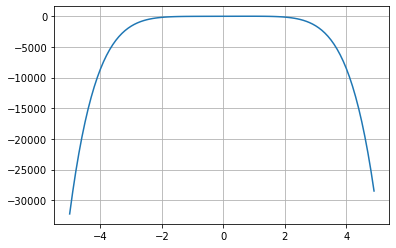

In [100]:
x = np.arange(-5,5,0.1)
plt.plot(x, -2*x**6 -1.5*x**4 +10*x+2)
plt.grid()
plt.show()

In [101]:
funcx = lambda x: -2*x**6 -1.5*x**4 +10*x+2
dx = lambda x: -12*x*5 -6*x*3 +10
root,fx,ea,itera = newtraph(funcx,dx,1 , es = 0.05)
print("root:" , root, "fx:" ,fx , "ea: ",ea , "itera: " , itera)

root: 1.3208123567463566 fx: 0.024134563683501753 ea:  0.044591711576717846 itera:  9


In [102]:
root,fx,ea,itera = secant(funcx,0,1 , es = 0.05)
print("root:" , root, "fx:" ,fx , "ea: ",ea , "itera: " , itera)

root: -0.1997485011884186 fx: 3.1701086200541795e-11 ea:  0.00016674413683296805 itera:  5


In [103]:
root,fx,ea,itera = modified_secant(funcx, 1 ,0.000001, es = 0.05)
print("root:" , root, "fx:" ,fx , "ea: ",ea , "itera: " , itera)

root: 1.3212754836326968 fx: -1.870006567372684e-07 ea:  0.0031121553927144544 itera:  7


In [105]:
root,fx,ea,itera = bisect(funcx,0,1,0.05)
print("root:" , root, "fx:" ,fx , "ea: ",ea , "itera: " , itera)

No.
root: [] fx: [] ea:  [] itera:  []


In [2]:
import numpy as np
from numpy.linalg import inv

In [54]:
def transposing (A):        
    row = int(A.shape[0])
    col = int(A.shape[1])
    result = np.zeros((col,row))
    for i in range(0,row):
        for j in range(0,col):
            result[j][i] = A[i][j]
    return result

In [108]:
def permuting (A,r1,r2):
    row = int(A.shape[0])
    if(r1> row or r2>row):
        print("row err!!!!")
        return
    r1-=1
    r2-=1
    I = np.eye(row)
    I[r1][r1] = 0
    I[r2][r2] = 0
    I[r1][r2] =1
    I[r2][r1] = 1
    return np.dot(I,A)

In [116]:
A = np.array([[4,7],[1,2],[5,6]])
B = np.array([[4,3,7],[1,2,7],[2,0,4]])
C = np.array([[3],[6],[1]])
D = np.array([[9,4,3,-6],[2,-1,7,5]])
E = np.array([[1,5,8],[7,2,3],[4,0,6]])
F = np.array([[3,0,1],[1,7,3]])
G = np.array([[7,6,4]])


In [117]:
A

array([[4, 7],
       [1, 2],
       [5, 6]])

In [118]:
transposing(A)

array([[4., 1., 5.],
       [7., 2., 6.]])

In [119]:
#1
E+B

array([[ 5,  8, 15],
       [ 8,  4, 10],
       [ 6,  0, 10]])

In [131]:
#2 차원이 안맞음
A+F

In [121]:
#3
B-E

array([[ 3, -2, -1],
       [-6,  0,  4],
       [-2,  0, -2]])

In [122]:
#4
7*B

array([[28, 21, 49],
       [ 7, 14, 49],
       [14,  0, 28]])

In [123]:
#5
transposing(C)

array([[3., 6., 1.]])

In [124]:
#6
np.dot(E,B)

array([[25, 13, 74],
       [36, 25, 75],
       [28, 12, 52]])

In [125]:
#7
np.dot(B,A)

array([[54, 76],
       [41, 53],
       [28, 38]])

In [126]:
#8
transposing(D)

array([[ 9.,  2.],
       [ 4., -1.],
       [ 3.,  7.],
       [-6.,  5.]])

In [132]:
#9 차원이 안맞음
np.dot(A,C)

In [128]:
#10
np.dot(np.eye(3),B)

array([[4., 3., 7.],
       [1., 2., 7.],
       [2., 0., 4.]])

In [129]:
#11
np.dot(transposing(E),E)

array([[ 66.,  19.,  53.],
       [ 19.,  29.,  46.],
       [ 53.,  46., 109.]])

In [130]:
#12
np.dot(transposing(C),C)

array([[46.]])

In [152]:
A = np.array([[6,-1],[12,8],[-5,4]])
B = np.array([[4,0],[0.5,2]])
C = np.array([[2,-2],[3,1]])

In [114]:
A

array([[ 6, -1],
       [12,  8],
       [-5,  4]])

In [115]:
permuting(A,2,3)

array([[ 6., -1.],
       [-5.,  4.],
       [12.,  8.]])

In [135]:
arr = np.array([[0,-7,5],[0,4,7],[-4,3,-7]])
ans = np.array([[50],[-30],[70]])

In [134]:
arr

array([[ 0, -7,  5],
       [ 0,  4,  7],
       [-4,  3, -7]])

In [136]:
x = np.dot(inv(arr),ans)
x

array([[-22.68115942],
       [ -7.24637681],
       [ -0.14492754]])

In [137]:
transposing(arr)

array([[ 0.,  0., -4.],
       [-7.,  4.,  3.],
       [ 5.,  7., -7.]])

In [138]:
inv(arr)

array([[-0.17753623, -0.12318841, -0.25      ],
       [-0.10144928,  0.07246377, -0.        ],
       [ 0.05797101,  0.10144928,  0.        ]])

In [153]:
np.dot(A,B)

array([[ 23.5,  -2. ],
       [ 52. ,  16. ],
       [-18. ,   8. ]])

In [154]:
np.dot(A,C)

array([[  9, -13],
       [ 48, -16],
       [  2,  14]])

In [157]:
#np.dot(B,A)

In [156]:
np.dot(B,C)

array([[ 8., -8.],
       [ 7.,  1.]])

In [149]:
#np.dot(C,A)

In [158]:
np.dot(C,B)

array([[ 7. , -4. ],
       [12.5,  2. ]])

In [170]:
K = np.array([[130,-50,0,0,0],[-50,120,-70,0,0],[0,-70,170,-100,0],[0,0,-100,120,-20],[0,0,0,-20,20]])
mg = np.array([[539],[735],[588],[735],[882]])
x1 = np.array([[10],[10],[10],[10],[10]])

In [171]:
K

array([[ 130,  -50,    0,    0,    0],
       [ -50,  120,  -70,    0,    0],
       [   0,  -70,  170, -100,    0],
       [   0,    0, -100,  120,  -20],
       [   0,    0,    0,  -20,   20]])

In [174]:
xs = np.dot(inv(K),mg)
xs +=x1

In [175]:
xs

array([[ 53.4875],
       [112.2875],
       [143.7875],
       [159.9575],
       [204.0575]])

In [1]:
import numpy as np
import math

In [52]:
def GaussNaive(A,b):
    row = int(A.shape[0])
    col = int(A.shape[1])
    
    n = col
    if (row != col):
        print("Matrix A must be square!!!")
        return
    nb = n+1
    Aug = np.concatenate([A,b] , axis = 1)
    
    for pivot_row in range(0,n-1):
        for row in range(pivot_row+1 , n):
            factor = Aug[row][pivot_row]/Aug[pivot_row][pivot_row]
            Aug[row][pivot_row:nb] -= factor * Aug[pivot_row][pivot_row:nb]
    x = np.zeros(n)
    x[n-1] = Aug[n-1][n] / Aug[n-1][n-1]
    
    print(Aug)
    for i in range (n-2 , -1 , -1):
        x[i] = (Aug[i][n] - np.dot(Aug[i][i+1:n] , x[i+1:n]))/ Aug[i][i]
    return x

In [34]:
A = np.array([[3,-0.1,-0.2],[0.1,7,-0.3],[0.3,-0.2,10]])
b = np.array([[7.85],[-19.3],[71.4]])

In [35]:
result = GaussNaive(A,b)

In [38]:
abs(Aug[1: , 1]).argmax()

0

In [36]:
result

array([ 3. , -2.5,  7. ])

In [21]:
print(A)

[[ 3.  -0.1 -0.2]
 [ 0.1  7.  -0.3]
 [ 0.3 -0.2 10. ]]


In [53]:
def P_GaussNaive(A,b):
    row = int(A.shape[0])
    col = int(A.shape[1])
    
    n = col
    if (row != col):
        print("Matrix A must be square!!!")
        return
    nb = n+1
    Aug = np.concatenate([A,b] , axis = 1)
    
    for pivot_row in range(0,n-1):
        maxindex = abs(Aug[pivot_row: , pivot_row]).argmax()
        ipr = maxindex + pivot_row
        
        if (ipr != pivot_row):
            Aug[[pivot_row,ipr]] = Aug[[ipr,pivot_row]]
        for row in range(pivot_row+1 , n):
            factor = Aug[row][pivot_row]/Aug[pivot_row][pivot_row]
            Aug[row][pivot_row:nb] -= factor * Aug[pivot_row][pivot_row:nb]
    x = np.zeros(n)
    x[n-1] = Aug[n-1][n] / Aug[n-1][n-1]
    
    print(Aug)
    for i in range (n-2 , -1 , -1):
        x[i] = (Aug[i][n] - np.dot(Aug[i][i+1:n] , x[i+1:n]))/ Aug[i][i]
    return x
    

In [54]:
A = np.array([[0.0003 , 3.0000] , [1.0000 , 1.0000]])
b = np.array([[2.0001], [1.0000]])

In [55]:
P_GaussNaive(A,b)

[[1.     1.     1.    ]
 [0.     2.9997 1.9998]]


array([0.33333333, 0.66666667])

In [56]:
GaussNaive(A,b)

[[ 3.0000e-04  3.0000e+00  2.0001e+00]
 [ 0.0000e+00 -9.9990e+03 -6.6660e+03]]


array([0.33333333, 0.66666667])

In [1]:
import numpy as np
import math

In [7]:
def pentadiag(d,e,f,g,h,r):
    n = len(f)
    result = [0 for i in range(n)]
    factor = e[1]/f[0]
    f[1] = f[1] - factor * g[0]
    g[1] = g[1] - factor * h[0]
    r[1] = r[1] - factor * r[0]
    for i in range(2,n):
        factor = d[i]/f[i-2]
        f[i] = f[i] - factor * h[i-2]
        e[i] = e[i] - factor * g[i-2]
        r[i] = r[i] - factor * r[i-2]
        factor = e[i]/f[i-1]
        f[i] = f[i] - factor * g[i-1]
        if(i!= n-1):
            g[i] = g[i] - factor * h[i-1]
        r[i] = r[i] - factor * r[i-1]
    result[n-1] = r[n-1]/f[n-1]
    result[n-2] = (r[n-2] - g[n-2] * result[n-1])/f[n-2]
    for i in range(n-3, -1 , -1):
        result[i] = (r[i] - (g[i]*result[i+1]) - (h[i]*result[i+2]))/f[i]
    return result

In [25]:
d = [0,0,-1,-4,-7]
e = [0,-2,-3,-2,-3]
f = [8,9,7,12,-15]
g = [-2,-4,-1,-5,0]
h = [-1,-1,-2,0,0]
r = [5,2,1,1,5]

In [28]:
x = pentadiag(d,e,f,g,h,r)

In [29]:
x

[0.8177834085297273,
 0.5837265522991997,
 0.3748141636394193,
 0.11871549907566603,
 -0.5319897095135289]

In [30]:
A = np.array([[8,-2,-1,0,0],[-2,9,-4,-1,0],[-1,-3,7,-1,-2],[0,-4,-2,12,-5],[0,0,-7,-3,-15]])
x = np.array([[0.8177834085297273],[0.5837265522991997],[0.3748141636394193],[0.11871549907566603],[-0.5319897095135289]])

In [31]:
np.dot(A,x)

array([[5.],
       [2.],
       [1.],
       [1.],
       [5.]])

In [46]:
def P_GaussNaive(A,b,tol):
    t = np.linalg.det(A)
    t = abs(t)
    if(t< tol):
        print("Det is  close to zero!!!")
        return
    row = int(A.shape[0])
    col = int(A.shape[1])
    
    n = col
    if (row != col):
        print("Matrix A must be square!!!")
        return
    nb = n+1
    Aug = np.concatenate([A,b] , axis = 1)
    
    for pivot_row in range(0,n-1):
        maxindex = abs(Aug[pivot_row: , pivot_row]).argmax()
        ipr = maxindex + pivot_row
        
        if (ipr != pivot_row):
            Aug[[pivot_row,ipr]] = Aug[[ipr,pivot_row]]
        for row in range(pivot_row+1 , n):
            factor = Aug[row][pivot_row]/Aug[pivot_row][pivot_row]
            Aug[row][pivot_row:nb] -= factor * Aug[pivot_row][pivot_row:nb]
    x = np.zeros(n)
    x[n-1] = Aug[n-1][n] / Aug[n-1][n-1]
    
    for i in range (n-2 , -1 , -1):
        x[i] = (Aug[i][n] - np.dot(Aug[i][i+1:n] , x[i+1:n]))/ Aug[i][i]
    return x

In [47]:
A = np.array([[0.5,-1],[1.02,-2]])
b = np.array([[-9.5],[-18.8]])
tol = 1 * (10**-5)

In [48]:
x = P_GaussNaive(A,b,tol)

In [49]:
x

array([10. , 14.5])

In [1]:
import numpy as np

In [4]:
L = np.array([[1,0,0] , [0.286,1,0],[0.143,-0.29,1]])
U = np.array([[7,2,-3], [0,4.428,-2.15],[0,0,-6.195]])

In [6]:
A = np.dot(L,U)

In [7]:
X = np.array([[0.938],[3.564],[0.564]])

In [8]:
np.dot(A,X)

array([[12.002     ],
       [18.001364  ],
       [-6.00264368]])

In [9]:
U = np.array([[2.83,7.07,5.65],[0,5.48,1.83],[0,0,4.97]])

In [11]:
A = np.dot(U.T,U)

In [12]:
X = np.array([[17.18],[1.35],[-4.04]])

In [13]:
np.dot(A,X)

array([[100.006257],
       [249.865257],
       [ 99.876283]])

In [14]:
U = np.array([[1.41,-0.71,0],[0,1.22,0.82],[0,0,1.15]])

In [15]:
np.dot(U.T,U)

array([[ 1.9881, -1.0011,  0.    ],
       [-1.0011,  1.9925,  1.0004],
       [ 0.    ,  1.0004,  1.9949]])

In [84]:
from scipy.linalg import lu
import numpy as np
from numpy.linalg import inv
from numpy.linalg import cond

In [3]:
A = np.array([[10,2,-1],[-3,-6,2],[1,1,5]])
X1 = np.array([[1],[0],[0]])
X2 = np.array([[0],[1],[0]])
X3 = np.array ([[0],[0],[1]])

In [4]:
p,l,u = lu(A)

In [5]:
l

array([[ 1.        ,  0.        ,  0.        ],
       [-0.3       ,  1.        ,  0.        ],
       [ 0.1       , -0.14814815,  1.        ]])

In [6]:
u

array([[10.        ,  2.        , -1.        ],
       [ 0.        , -5.4       ,  1.7       ],
       [ 0.        ,  0.        ,  5.35185185]])

In [10]:
d1 = np.dot(inv(l),X1)
A1i = np.dot(inv(u),d1)
d2 = np.dot(inv(l),X2)
A2i = np.dot(inv(u),d2)
d3 = np.dot(inv(l),X3)
A3i = np.dot(inv(u),d3)

In [16]:
Ai = np.concatenate((A1i,A2i,A3i),axis =1)

In [17]:
Ai

array([[ 0.11072664,  0.03806228,  0.00692042],
       [-0.05882353, -0.17647059,  0.05882353],
       [-0.01038062,  0.02768166,  0.18685121]])

In [18]:
np.dot(A,Ai)

array([[ 1.00000000e+00,  3.12250226e-17,  0.00000000e+00],
       [ 3.46944695e-17,  1.00000000e+00,  5.55111512e-17],
       [-2.08166817e-17,  2.77555756e-17,  1.00000000e+00]])

In [19]:
A = np.array([[-8,1,-2],[2,-6,-1],[-3,-1,7]])

In [24]:
p,l,u = lu(A)

In [25]:
d1 = np.dot(inv(l),X1)
A1i = np.dot(inv(u),d1)
d2 = np.dot(inv(l),X2)
A2i = np.dot(inv(u),d2)
d3 = np.dot(inv(l),X3)
A3i = np.dot(inv(u),d3)

In [26]:
Ai = np.concatenate((A1i,A2i,A3i),axis =1)

In [27]:
Ai

array([[-0.1152815 , -0.01340483, -0.03485255],
       [-0.02949062, -0.16621984, -0.03217158],
       [-0.0536193 , -0.02949062,  0.1233244 ]])

In [28]:
np.dot (A,Ai)

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.38777878e-17, 1.00000000e+00, 4.16333634e-17],
       [5.55111512e-17, 0.00000000e+00, 1.00000000e+00]])

In [31]:
A = np.array([[8,2,-10],[-9,1,3],[15,-1,6]])

In [32]:
A

array([[  8,   2, -10],
       [ -9,   1,   3],
       [ 15,  -1,   6]])

In [37]:
A = np.array([[8/8,2/8,-10/8],[-9/3,1/3,3/3],[15/15,-1/15,6/15]])

In [38]:
A

array([[ 1.        ,  0.25      , -1.25      ],
       [-3.        ,  0.33333333,  1.        ],
       [ 1.        , -0.06666667,  0.4       ]])

In [39]:
import math

In [40]:
#||A||f
Af = math.sqrt(1**2 + (0.25)**2 + (-1.25)**2 + (-3)**2 + (0.333)**2 + 1 + 1 + (0.666)**2 + (0.4 )**2)

In [41]:
Af

3.7867459645452852

In [45]:
A1 = 0.25 + 0.333 -0.666

In [46]:
A1

-0.08300000000000007

In [47]:
Ainf = 1-0.666+0.4

In [48]:
Ainf

0.734

In [51]:
A1 = np.array([[-8,1,-2],[2,-6,-1],[-3,-1,7]])
A2 = np.array([[15,-3,-1],[-3,18,-6],[-4,-1,12]])

In [72]:
def fro_norm(A):
    result  = 0
    for i in range (0,len(A)):
        for j in range (0,len(A)):
            result += A[i][j] * A[i][j]
    result = math.sqrt(result)
    return result
def inf_norm(A):
    result = -123456789
    for i in range (0,len(A)):
        temp =0
        for j in range(0,len(A)):
            temp+=abs(A[i][j])
        if(temp>result):
            result = temp
    return result

In [73]:
A1

array([[-8,  1, -2],
       [ 2, -6, -1],
       [-3, -1,  7]])

In [74]:
fro_norm(A1)

13.0

In [75]:
inf_norm(A1)

11

In [76]:
A2

array([[15, -3, -1],
       [-3, 18, -6],
       [-4, -1, 12]])

In [77]:
fro_norm(A2)

27.65863337187866

In [78]:
inf_norm(A2)

27

In [79]:
A = np.array([[16/16,4/16,1/16],[4/4,2/4,1/4],[49/49,7/49,1/49]])
Ai = inv(A)

In [80]:
A

array([[1.        , 0.25      , 0.0625    ],
       [1.        , 0.5       , 0.25      ],
       [1.        , 0.14285714, 0.02040816]])

In [81]:
Ai

array([[ -2.66666667,   0.4       ,   3.26666667],
       [ 24.        ,  -4.4       , -19.6       ],
       [-37.33333333,  11.2       ,  26.13333333]])

In [82]:
condi = inf_norm(A) * inf_norm(Ai)

In [83]:
condi

130.66666666666669

In [85]:
cond(A)

102.74429879133119

In [86]:
fro_norm(A) * fro_norm(Ai)

104.29709860538577

In [105]:
import numpy as np
import math
from numpy.linalg import inv

In [96]:
def gauss_seidel_itera(A,b,es = 1.0e-4, maxit = 100,lamb = 1):
    row = int(A.shape[0])
    col = int(A.shape[1])
    
    if (row != col):
        print("matrix A must be square!!!!")
        return
    C = np.zeros((row,col))
    for i in range(0,row):
        for j in range(0,col):
            C[i][j] = float(A[i][j])
    x= np.zeros((row,1))
    xold = np.zeros((row,1))
    xtemp = np.zeros((row,1))
    ea = np.zeros((row,1))
    d = np.zeros((row,1))
    n = row

    for i in range(0,n):
        for j in range(0,n):
            C[i][j] = C[i][j]/A[i][i]
    for i in range(0,n):
        C[i][i] = 0
    for i in range(0,n):
        d[i][0] = b[i][0]/A[i][i]
    itera = 0
    while True:
        for i in range(0,n):
            xold[i][0] = x[i][0]
        for i in range(0,n):
            xtemp[i][0] = d[i][0] - float(np.dot(C[i],x))
            x[i][0] = lamb * xtemp[i][0] + (1-lamb)*xold[i][0]
            if(x[i][0] !=0):
                ea[i][0] = abs((x[i][0] - xold[i][0])/x[i][0]) *100
        itera +=1
        if(float(max(ea)) <= es or itera >= maxit ):
            break
    return x

In [108]:
A = np.array([[3,8],[6,-1]])
b = np.array([[11],[5]])

In [109]:
result = gauss_seidel_itera(A,b,maxit = 3,lamb = 1.25)

In [110]:
result

array([[ 2329.24479167],
       [17635.7421875 ]])

In [116]:
A = np.array([[6,-1],[3,8]])
b = np.array([[5],[11]])

In [117]:
result = gauss_seidel_itera(A,b,maxit = 3,lamb = 1.25)

In [118]:
result

array([[0.97492536],
       [1.03056401]])

In [123]:
abs((1-result[0][0])/1)

0.025074640909830803

In [122]:
abs((1-result[1][0])/1)

0.03056401014328003

In [101]:
A = np.array([[3,-0.1,-0.2],[0.1,7,-0.3],[0.3,-0.2,10]])
b = np.array([[7.85],[-19.3],[71.4]])

In [103]:
result = gauss_seidel_itera(A,b,es = 0.05)

In [104]:
result

array([[ 3.00000035],
       [-2.50000004],
       [ 6.99999999]])

In [124]:
A = np.array([[0.8,-0.4,0],[-0.4,0.8,-0.4],[0,-0.4,0.8]])
b = np.array([[41],[25],[105]])

In [125]:
result = gauss_seidel_itera(A,b,es = 0.05)

In [126]:
result

array([[173.70407104],
       [244.95407104],
       [253.72703552]])

In [129]:
result = gauss_seidel_itera(A,b,lamb = 1.2,es =0.05)

In [130]:
result

array([[173.79312906],
       [245.05797317],
       [253.76710209]])

In [131]:
np.dot(inv(A),b)

array([[173.75],
       [245.  ],
       [253.75]])

In [132]:
A = np.array([[10,2,-1],[-3,-6,2],[1,1,5]])
b = np.array([[27],[-61.5],[-21.5]])

In [133]:
result = gauss_seidel_itera(A,b,es = 0.05)

In [134]:
result

array([[ 0.50000269],
       [ 8.00000127],
       [-6.00000079]])

In [136]:
np.dot(inv(A),b)

array([[ 0.5],
       [ 8. ],
       [-6. ]])

## y + x^2 - x  -0.5 = 0 -f1
## y+5xy -x^2 = 0 -f2
### @f1/@x = 2x-1  @f1/@y = 1

### @f2/@x = 5y-2x @f2/@y = 1+5x

## x = y = 1.2

In [141]:
lambf1x = 2.3 
lambf1y = 1
lambf2x = 3.6 
lambf2y = 7

In [142]:
jacobi = lambf1x*lambf2y - lambf2x*lambf1y

In [143]:
jacobi

12.499999999999998

In [145]:
f1assum = 1.2 + (1.2*1.2) -1.2 -0.5
f2assum = 1.2 + 5*(1.2 *1.2) -(1.2*1.2)

In [146]:
f1assum

0.9399999999999997

In [147]:
f2assum

6.959999999999999

In [149]:
x = 1.2 -((f1assum * lambf2y)-(f2assum * lambf1y)/jacobi)
y = 1.2 -((f2assum * lambf1x)-(f1assum * lambf2x)/jacobi)

In [150]:
x

-4.823199999999998

In [151]:
y

-14.537279999999996

In [2]:
import math
import numpy as np

In [3]:
data = [0.90,1.42,1.30,1.55,1.63,1.32,1.35,1.47,1.95,1.66,1.96,1.47,1.92,1.35,1.05,1.85,1.74,1.65,1.78,1.71,2.29,1.82,2.06,2.14,1.27]

In [4]:
#mean
np.mean(data)

1.6244000000000003

In [5]:
#median
np.median(data)

1.65

In [6]:
#range
min(data)

0.9

In [7]:
max(data)

2.29

In [8]:
#표준편차
math.sqrt(np.var(data))

0.3325306602405258

In [9]:
#분산
np.var(data)

0.11057663999999999

In [10]:
#분산계수
((math.sqrt(np.var(data)))/np.mean(data)) * 100 

20.47098376265241

In [11]:
import matplotlib.pyplot as plt

(array([1., 1., 2., 4., 3., 4., 4., 3., 2., 1.]),
 array([0.9  , 1.039, 1.178, 1.317, 1.456, 1.595, 1.734, 1.873, 2.012,
        2.151, 2.29 ]),
 <BarContainer object of 10 artists>)

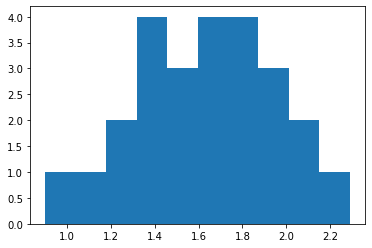

In [12]:
plt.hist(data)

In [31]:
x = np.array([2,4,6,7,10,11,14,17,20])
n = len(x)
y = np.array([4,5,6,5,8,8,6,9,12])

xx = sum(x*x)
xy = sum(x*y)
y_m = np.mean(y)
x_m = np.mean(x)
x = sum(np.array([2,4,6,7,10,11,14,17,20]))
y = sum(np.array([4,5,6,5,8,8,6,9,12]))


In [33]:
a = (n*xy - x*y)/(n*xx - x*x)

In [34]:
a0 = y_m -a *x_m

In [36]:
x = np.arange(-5,5)
y = a * x +a0

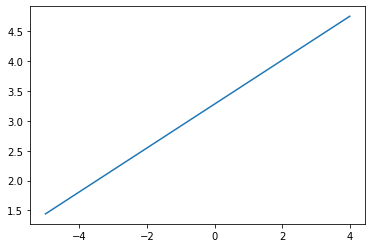

In [37]:
plt.plot(x,y)
plt.show()

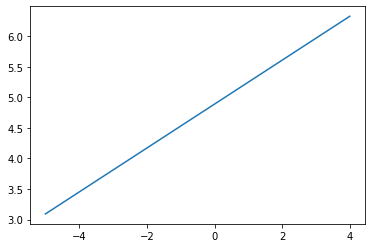

In [39]:
x = np.array([0,2,4,6,9,11,12,15,17,19])
n = len(x)
y = np.array([5,6,7,6,9,8,8,10,12,12])

xx = sum(x*x)
xy = sum(x*y)
y_m = np.mean(y)
x_m = np.mean(x)
x = sum(np.array([0,2,4,6,9,11,12,15,17,19]))
y = sum(np.array([5,6,7,6,9,8,8,10,12,12]))
a = (n*xy - x*y)/(n*xx - x*x)
a0 = y_m -a *x_m
x = np.arange(-5,5)
y = a * x +a0
plt.plot(x,y)
plt.show()

In [1]:
import numpy as np
import math

In [10]:
def newtint(x,y,xx):
    #보간법
    n = len(x)
    if(len(y) != n):
        print("y len err!!!!!")
        return
    b = np.zeros((n,n))
    for i in range(0,n):
        b[i][0] = y[i]
    for j in range(1,n):
        for i in range(0,n-j):
            b[i][j] = (b[i+1][j-1] - b[i][j-1])/(x[i+j] - x[i])
    xt = 1
    yint = b[0][0]
    for j in range(0,n-1):
        xt = xt * (xx - x[j])
        yint += b[0][j+1] *xt
    return yint
    #return b

In [16]:
def lagrange(x,y,xx):
    n = len(x)
    if(len(y)!= n ):
        print("y len err!!!!")
        return
    s = 0
    for i in range(0,n):
        product = y[i]
        for j in range(0,n):
            if(i!=j):
                product*= (xx-x[j])/(x[i]-x[j])
        s+= product
    return s

In [17]:
x = [0,20,40]
y = [3.85,0.8,0.212]
xx = 15
result = lagrange(x,y,xx)

In [18]:
result

1.3316875

In [30]:
x = [0,1,2.5,3,4.5,5,6]
y = [2,5.4375,7.3516,7.5625,8.4453,9.1875,12]
xx = 3.5
newtint(x,y,xx)

7.742162962962962

In [31]:
x = [0,1,2,5.5,11,13,16,18]
y = [0.5,3.134,5.3,9.9,10.2,9.35,7.2,6.2]
xx = 8
newtint(x,y,xx)

10.734502995519037

In [34]:
x = [1,2,2.5,3,4,5]
y = [0,5,6.5,7,3,1]
xx = 3.4
newt_result = []
lagr_result = []
#1차
newt_result.append(newtint(x[3:5],y[3:5],xx))
lagr_result.append(lagrange(x[3:5],y[3:5],xx))
#2차
newt_result.append(newtint(x[2:5],y[2:5],xx))
lagr_result.append(lagrange(x[2:5],y[2:5],xx))
#3차
newt_result.append(newtint(x[1:5],y[1:5],xx))
lagr_result.append(lagrange(x[1:5],y[1:5],xx))

In [36]:
newt_result

[5.4, 6.200000000000001, 6.343999999999999]

In [37]:
lagr_result

[5.4, 6.199999999999999, 6.343999999999999]

In [4]:
e = 2.7182818284590452353602874713527

In [12]:
fx  = lambda x : (1- (e**(-x)))

In [16]:
fx(4)

0.9816843611112658

In [17]:
fx(0)

0.0

In [18]:
fx(1)

0.6321205588285577

In [19]:
fx(2)

0.8646647167633873

In [20]:
fx(3)

0.950212931632136

In [21]:
fx(4/3)

0.7364028618842732

In [22]:
fx(8/3)

0.9305165487771985

In [23]:
fx(4/5)

0.5506710358827784

In [24]:
fx(8/5)

0.7981034820053445

In [25]:
fx(12/5)

0.9092820467105874

In [26]:
fx(16/5)

0.9592377960216338

In [33]:
fy = lambda x : (x - 1/2*x**2 -x**4 + 1/3 * x **6)

In [34]:
fy(4)

1105.3333333333333

In [35]:
fy(-2)

1.3333333333333321

In [36]:
fx = lambda x: (1-x-4*x**3 + 2*x**5)

In [37]:
fx(4)

1789

In [38]:
fx(-2)

-29

In [39]:
fx(1)

-2

In [40]:
fx(0)

1

In [41]:
fx(2)

31

In [42]:
fx(-1/2)

1.9375

In [43]:
fx(1)

-2

In [46]:
fx(5/2)

131.3125